In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pathlib

sns.set_style('darkgrid')

# Centers

In [144]:
n_c = 10
dims = 3
l = np.arange(0,n_c,1)
centers = pd.DataFrame()

for i in l:
    c = np.random.uniform(low=-1.0, high=1.0, size=dims)
    centers[str(i)] = c

centers # Shape: (dims x classes)

,0,1,2,3,4,5,6,7,8,9
0,-0.290098,-0.569532,0.247893,0.336121,0.535056,-0.518637,-0.570908,-0.617271,-0.090935,-0.855528
1,0.967617,-0.440516,0.877281,-0.398921,0.483563,-0.871898,0.097820,0.520045,0.043676,-0.623335
2,-0.711835,0.544222,0.146913,-0.433947,0.725906,0.843238,0.915498,0.267208,0.316448,0.500966


# Data

In [145]:
s_samp = 3
samp_size = 100
index = []

samps1 = []

for i in np.arange(0,centers.shape[1],1):
    if i % 100 == 0:
        print(i)
    for j in np.arange(0,centers.shape[0],1):
        s = np.random.normal(loc=centers[str(i)][j], scale= s_samp, size= samp_size)
        samps1.append(s)

samps1 = np.array(samps1)

# Normalize everything
m_val = np.abs(samps1).max() 
samps1 = np.divide(samps1, m_val) 
        
print('We are going to the data frame creation.')
samps1 = pd.DataFrame(samps1)
print('Data frame creation successfully finished.')

for i in centers.columns:
    t = np.repeat(str(i),dims)
    for j in t:
        index.append(j)
samps1.index = index
samps1 = samps1.sample(frac=1)
print('We are done. ')

# Smaps have shape: (dims * classes   x   samp_size) (40x7)

0
We are going to the data frame creation.
Data frame creation successfully finished.
We are done. 


In [146]:
samps1.loc['0', :] # We have 10 samples (columns) which are 3D (rows)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.033698,0.140839,0.257334,-0.030120,0.042989,-0.158529,0.054838,0.098874,-0.245327,-0.253254,...,-0.423192,-0.308978,0.122581,-0.032922,0.052178,0.339846,-0.305171,0.262241,-0.367812,-0.154966
0,-0.170101,-0.180455,0.608603,-0.214281,0.216983,-0.332854,0.603384,0.469975,-0.021176,0.089375,...,0.152088,0.261478,-0.321042,-0.100045,0.302003,0.280460,0.667726,-0.269795,0.295827,0.093868
0,0.232054,0.071397,0.059832,-0.079190,-0.136503,-0.034045,-0.483637,-0.313181,0.121039,-0.175142,...,0.233403,0.279715,-0.067469,0.465411,-0.173431,-0.391401,-0.239777,0.576538,-0.185280,0.429555


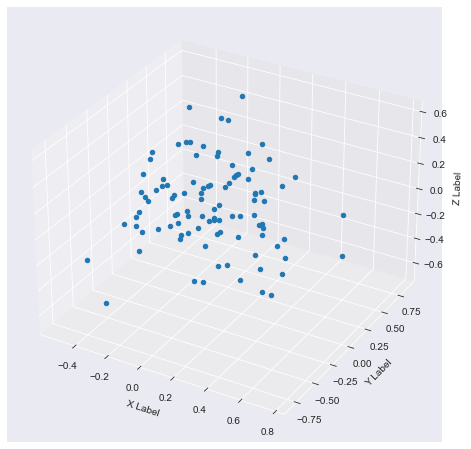

In [147]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

c = 0

samps = samps1.loc[str(c), :]

for i in np.unique(index)[c]:
    for j in samps.columns:
        d = samps.loc[i,j]
        for xs, ys, zs in [d]:
            ax.scatter(xs, ys, zs, c = color[int(i)]) 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Z-Score Implementation

In [148]:
means = np.mean(samps)
sds = np.std(samps)

In [149]:
zns = np.divide((samps - means * np.ones(len(samps.columns))),sds)

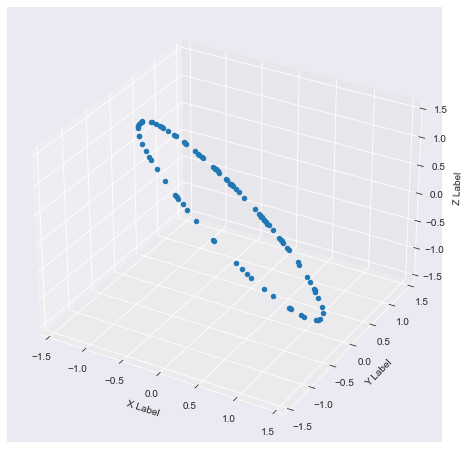

In [150]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


for i in np.unique(zns.index):
    for j in zns.columns:
        d = zns.loc[i,j]
        for xs, ys, zs in [d]:
            ax.scatter(xs, ys, zs, c = color[int(i)]) 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Now for all classes

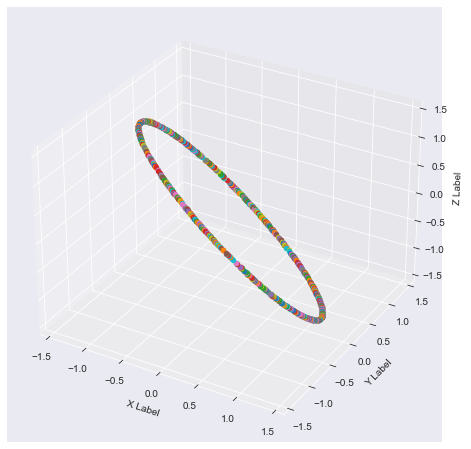

In [100]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


for i in np.unique(index):
    for j in samps1.columns:
        class_data = samps1.loc[str(i), :]
        class_mean = np.mean(class_data)
        class_sd = np.std(class_data)

        zns = np.divide((class_data - class_mean * np.ones(len(class_data.columns))),class_sd)

        d = zns.loc[i,j]
        # if i == '3':
        for xs, ys, zs in [d]:
            ax.scatter(xs, ys, zs, c = color[int(i)]) 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Creating Z-Norm Dataset

In [2]:
n_c = 10
dims = 3
l = np.arange(0,n_c,1)
centers = pd.DataFrame()

for i in l:
    c = np.random.uniform(low=-1.0, high=1.0, size=dims)
    centers[str(i)] = c

centers.head() # Shape: (dims x classes)

,0,1,2,3,4,5,6,7,8,9
0,-0.123081,0.374426,-0.808725,-0.592169,0.543240,0.974937,0.499508,-0.321341,-0.557080,0.560822
1,-0.329221,-0.009699,-0.179450,0.173892,-0.766809,-0.713857,-0.668966,-0.189749,0.928621,-0.241455
2,0.499293,0.573823,0.404063,-0.469503,-0.198230,0.762410,0.447657,0.686065,-0.491225,-0.880564


In [3]:
s_samp = 1.25
samp_size = 100
index = []

samps1 = []
s_final = []

for i in np.arange(0,centers.shape[1],1):
    if i % 100 == 0:
        print(i)
    for j in np.arange(0,centers.shape[0],1):
        s = np.random.normal(loc=centers[str(i)][j], scale= s_samp, size= samp_size)
        samps1.append(s)
        if len(samps1) == dims:
            samps1 = np.array(samps1)
            s_m = np.mean(samps1, axis = 0)
            s_sd = np.std(samps1, axis = 0)
            zn = np.divide((samps1 - s_m * np.ones(samp_size)),s_sd)
            s_final.append(zn)
            samps1 = []
                
s_final = np.array(s_final)
m_val = np.abs(s_final).max() 
s_final = np.divide(s_final, m_val)
        
print('We are going to the data frame creation.')
samps1 = pd.DataFrame(np.array(s_final).reshape(centers.shape[1] * dims,samp_size))
print('Data frame creation successfully finished.')

for i in centers.columns:
    t = np.repeat(str(i),dims)
    for j in t:
        index.append(j)
samps1.index = index
samps1 = samps1.sample(frac=1)
print('We are done. ')

0
(10, 3, 100)
We are going to the data frame creation.
Data frame creation successfully finished.
We are done. 


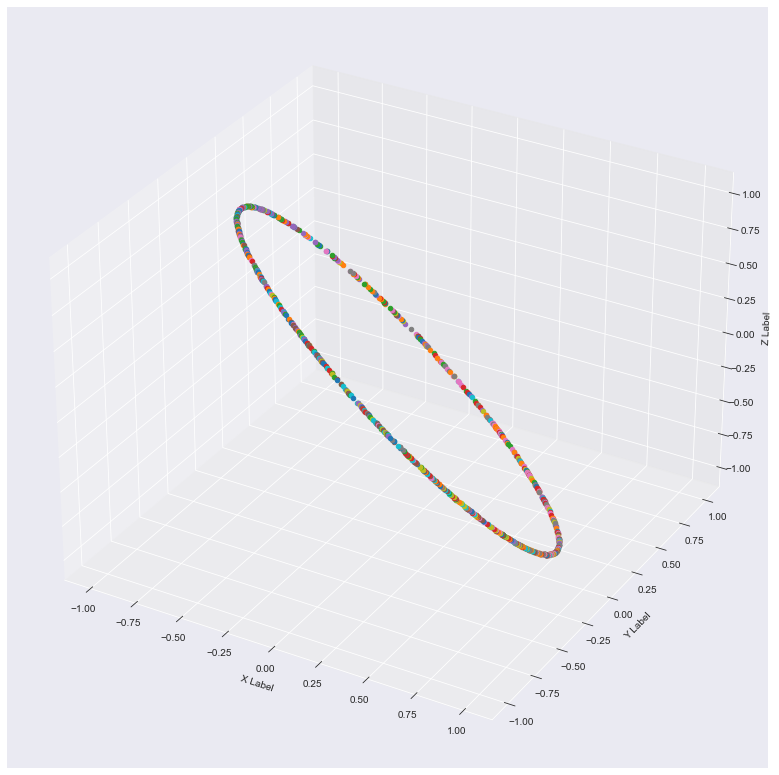

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in np.unique(index):
    for j in samps1.columns:
        d = samps1.loc[i,j]
        for xs, ys, zs in [d]:
            ax.scatter(xs, ys, zs, c = color[int(i)]) # color[int(i)]  color(int(i))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()